In [1]:
import cmsisdsp as cmsis

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import signal

from filt_plot_funcs import *

In [2]:
fs = 200

In [3]:
SCALE_FACTOR = 3.3

## Filters

### Low Pass Filter

In [4]:
b_low, a_low = signal.iirfilter(N=2, Wn=40, btype='lowpass', rs=3, ftype='cheby2', output='ba', fs=fs)


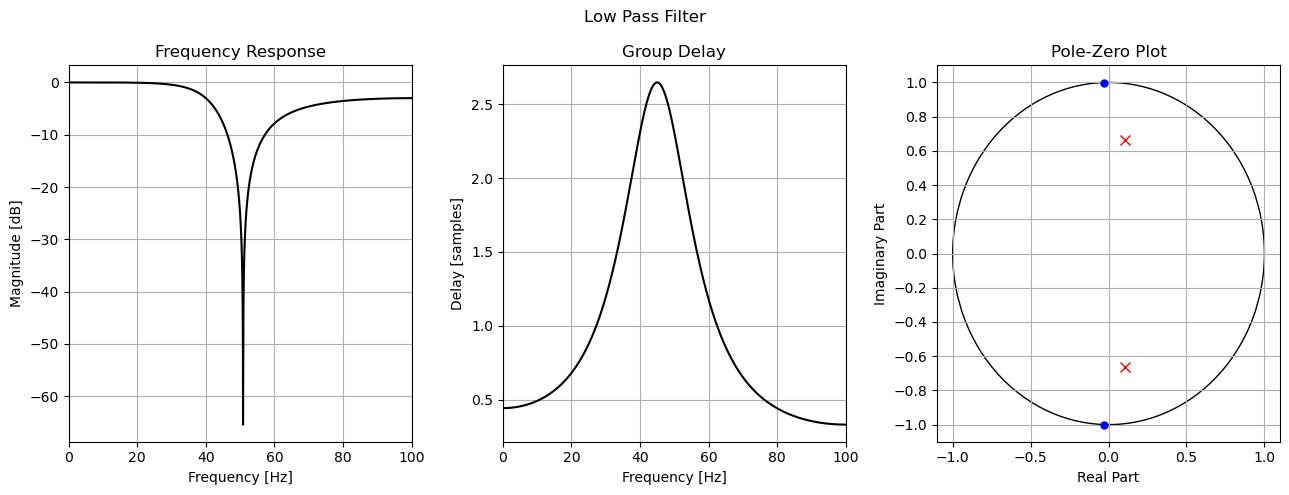

In [5]:
fig_low, axs_low = plt.subplots(1, 3, tight_layout=True, figsize=[13, 5])
plot_freq_domain(b_low, a_low, fs=fs, in_dB=True, ax1=axs_low[0], ax2=axs_low[1], filt_name='Low Pass Filter')
plot_pole_zero(b_low, a_low, ax=axs_low[2])


In [6]:
b_low_q31 = cmsis.arm_float_to_q31(b_low / SCALE_FACTOR)
a_low_q31 = cmsis.arm_float_to_q31(a_low / SCALE_FACTOR)

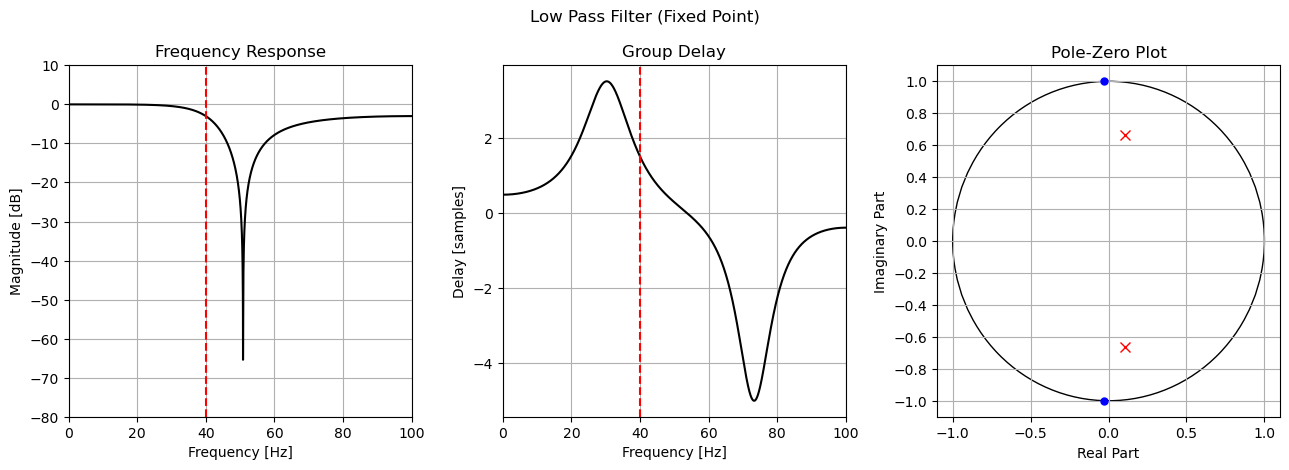

In [7]:
fig_low_q31, axs_low_q31 = plt.subplots(1, 3, tight_layout=True, figsize=[13, 4.75])
plot_freq_domain(b_low_q31, a_low_q31, fs=fs, in_dB=True, ax1=axs_low_q31[0], ax2=axs_low_q31[1], filt_name='Low Pass Filter (Fixed Point)')
plot_pole_zero(b_low_q31, a_low_q31, ax=axs_low_q31[2])

axs_low_q31[0].set_ylim([-80, 10])

for ax in axs_low_q31:
    plt.sca(ax)
    plt.axvline(40, linestyle='--', color='r')


### High Pass Filter

In [8]:
b_high, a_high = signal.iirfilter(N=2, Wn=0.5, btype='highpass', rs=10, ftype='cheby2', output='ba', fs=fs)


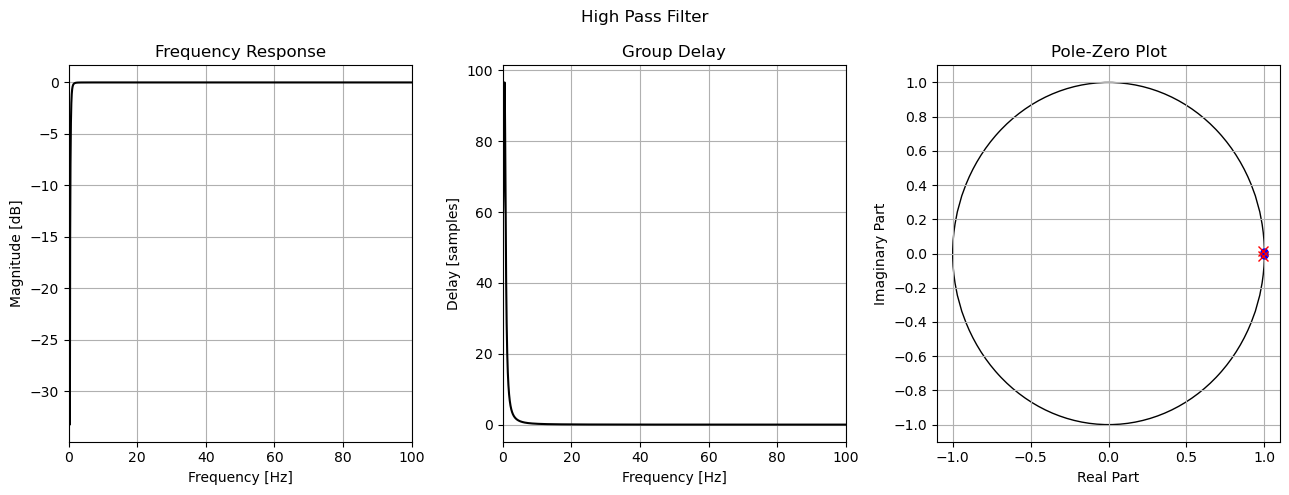

In [9]:
fig_high, axs_high = plt.subplots(1, 3, tight_layout=True, figsize=[13, 5])
plot_freq_domain(b_high, a_high, fs=fs, in_dB=True, ax1=axs_high[0], ax2=axs_high[1], filt_name='High Pass Filter')
plot_pole_zero(b_high, a_high, ax=axs_high[2])


In [10]:
b_high_q31 = cmsis.arm_float_to_q31(b_high / SCALE_FACTOR)
a_high_q31 = cmsis.arm_float_to_q31(a_high / SCALE_FACTOR)


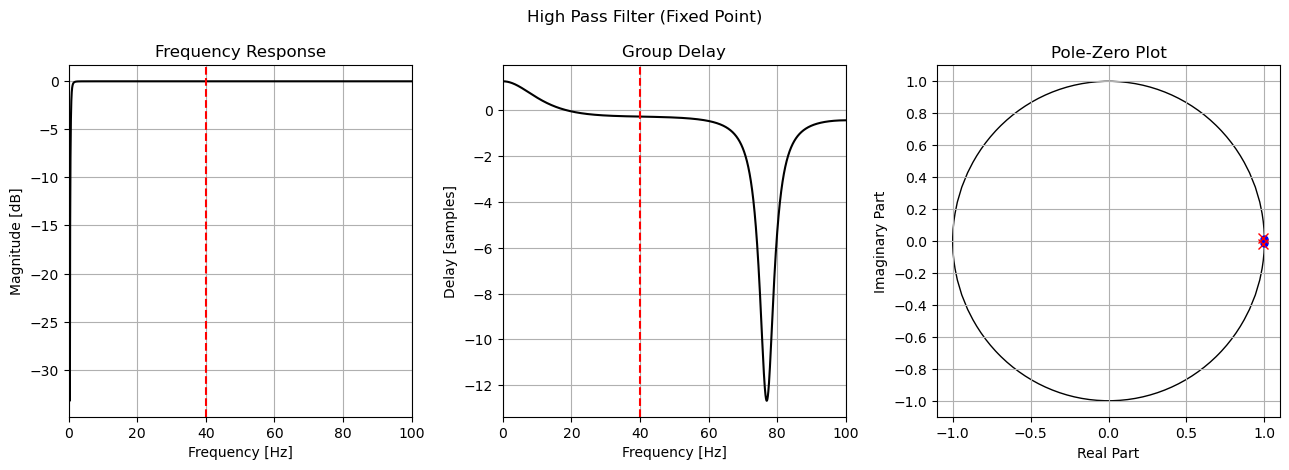

In [11]:
fig_high_q31, axs_high_q31 = plt.subplots(1, 3, tight_layout=True, figsize=[13, 4.75])
plot_freq_domain(b_high_q31, a_high_q31, fs=fs, in_dB=True, ax1=axs_high_q31[0], ax2=axs_high_q31[1], filt_name='High Pass Filter (Fixed Point)')
plot_pole_zero(b_high_q31, a_high_q31, ax=axs_high_q31[2])

for ax in axs_high_q31[:-1]:
    plt.sca(ax)
    plt.axvline(40, linestyle='--', color='r')


In [12]:
print(max(np.abs(b_high)))
print(max(np.abs(a_high)))

print(max(np.abs(b_low)))
print(max(np.abs(b_high)))


1.9769135818789034
1.976781731868328
0.6043470417453654
1.9769135818789034


In [13]:
b_notch, a_notch = signal.iirfilter(N=2, Wn=[59, 61], btype='bandstop', ftype='butter', output='ba', fs=fs)


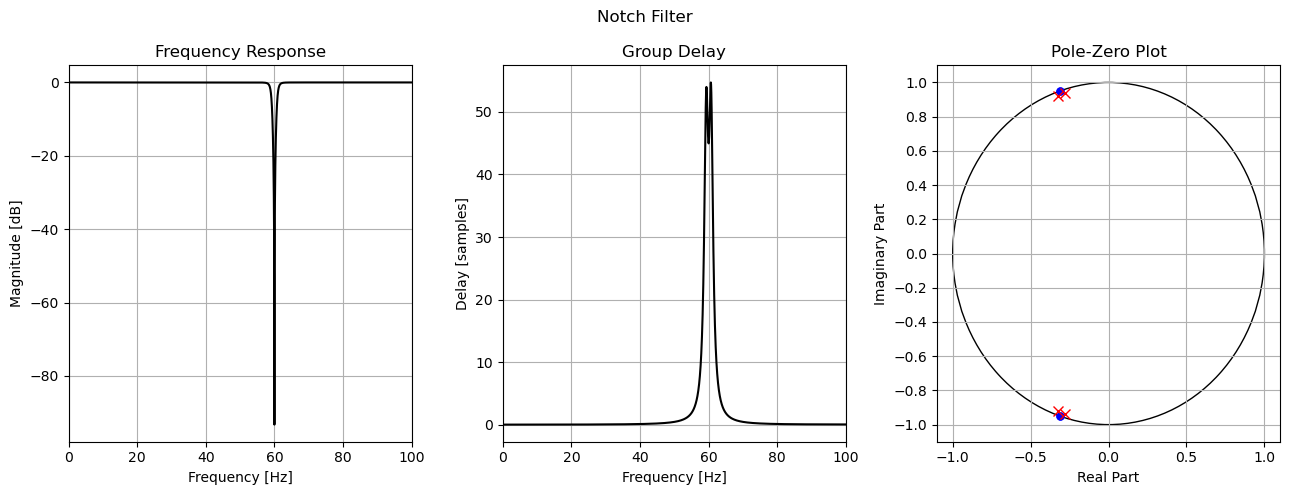

In [14]:
fig_notch, axs_notch = plt.subplots(1, 3, tight_layout=True, figsize=[13, 5])
plot_freq_domain(b_notch, a_notch, fs=fs, in_dB=True, ax1=axs_notch[0], ax2=axs_notch[1], filt_name='Notch Filter')
plot_pole_zero(b_notch, a_notch, ax=axs_notch[2])


In [15]:
b_notch_q31 = cmsis.arm_float_to_q31(b_notch / SCALE_FACTOR)
a_notch_q31 = cmsis.arm_float_to_q31(a_notch / SCALE_FACTOR)


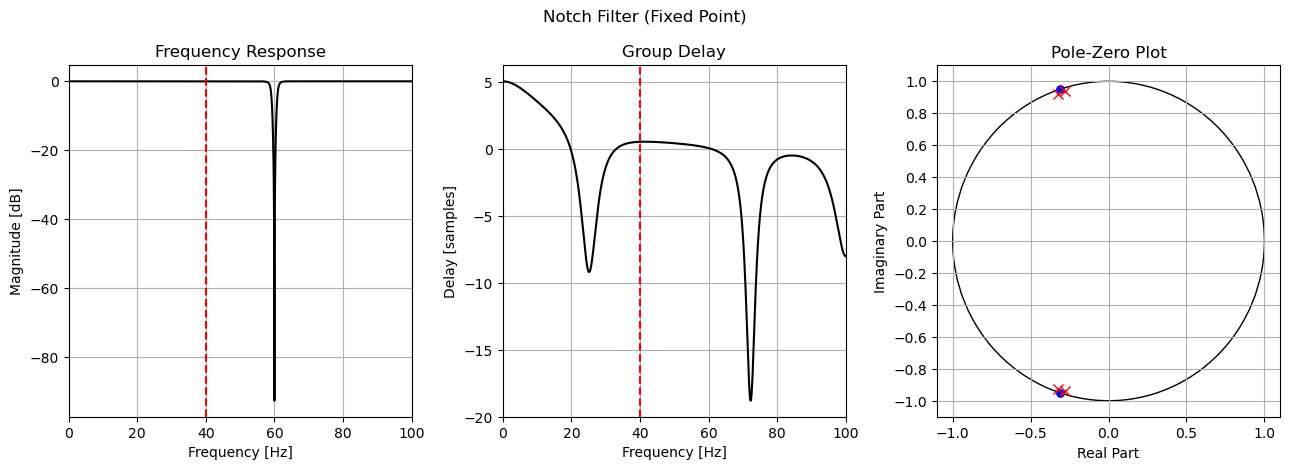

In [16]:
fig_notch_q31, axs_notch_q31 = plt.subplots(1, 3, tight_layout=True, figsize=[13, 4.75])
plot_freq_domain(b_notch_q31, a_notch_q31, fs=fs, in_dB=True, ax1=axs_notch_q31[0], ax2=axs_notch_q31[1], filt_name='Notch Filter (Fixed Point)')
plot_pole_zero(b_notch_q31, a_notch_q31, ax=axs_notch_q31[2])

for ax in axs_notch_q31[:-1]:
    plt.sca(ax)
    plt.axvline(40, linestyle='--', color='r')


In [17]:
print(max(np.abs(b_high)))
print(max(np.abs(a_high)))

print(max(np.abs(b_low)))
print(max(np.abs(a_low)))

print(max(np.abs(b_notch)))
print(max(np.abs(a_notch)))


1.9769135818789034
1.976781731868328
0.6043470417453654
1.0
2.278814291743475
2.276924908055795


## Tests

### ECG Data

In [21]:
ecgDataFrame = pd.read_csv("../data/csv/101.csv")
ecgDataFrame.set

ecgDataFrame.head()

,Unnamed: 0,0
0,0,-0.242364
1,1,-0.380401
2,2,-0.323779
3,3,-0.360415
4,4,-0.329810
